In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Import Data

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
for col in df.columns:
    # replace spaces with underscores
    df.rename(columns={col: col.replace(' ', '_')}, inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check Missing Values

In [4]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

### Target

In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Classifying wine quality as good if quality >= 6 and bad if quality < 6. Because quality of the wine is between 3 to 8, I think it's quite balanced with that statement.
<br>
Good : 6, 7, 8
<br>
Bad : 3, 4, 5

In [6]:
# boolean : 1 if good, 0 if bad
df['good'] = df.quality.apply(lambda x: 1 if x >= 6 else 0)

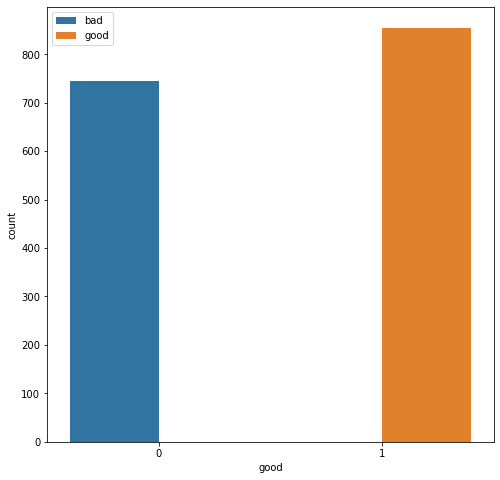

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x='good', data=df, hue='good')
plt.legend(['bad', 'good'])

### Numeric vs Target

In [8]:
# show columns list
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good'],
      dtype='object')

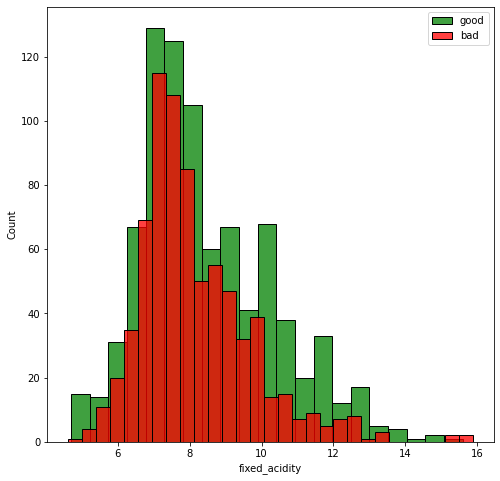

In [9]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.fixed_acidity[df.good == 1], color='green', label='good')
sns.histplot(x=df.fixed_acidity[df.good == 0], color='red', label='bad')
plt.legend()
    

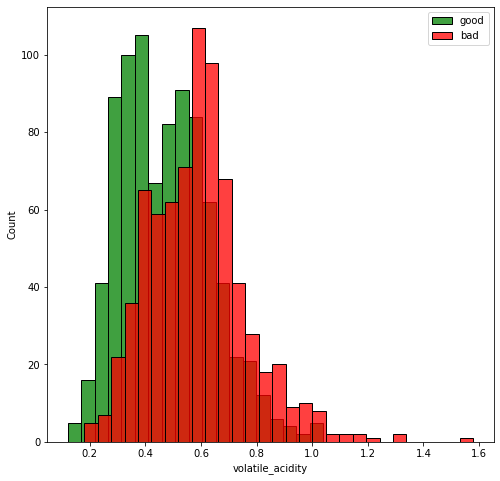

In [10]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.volatile_acidity[df.good == 1], color='green', label='good')
sns.histplot(x=df.volatile_acidity[df.good == 0], color='red', label='bad')
plt.legend()

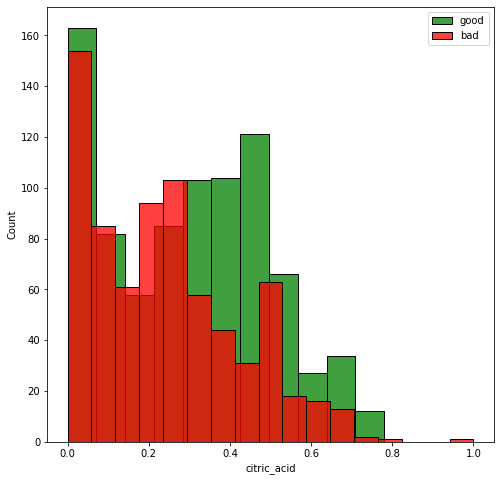

In [11]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.citric_acid[df.good == 1], color='green', label='good')
sns.histplot(x=df.citric_acid[df.good == 0], color='red', label='bad')
plt.legend()

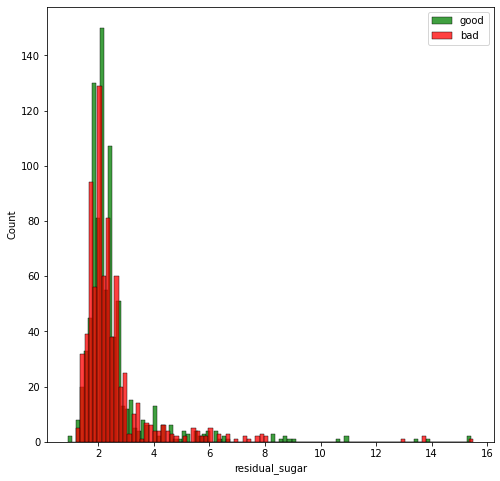

In [12]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.residual_sugar[df.good == 1], color='green', label='good')
sns.histplot(x=df.residual_sugar[df.good == 0], color='red', label='bad')
plt.legend()

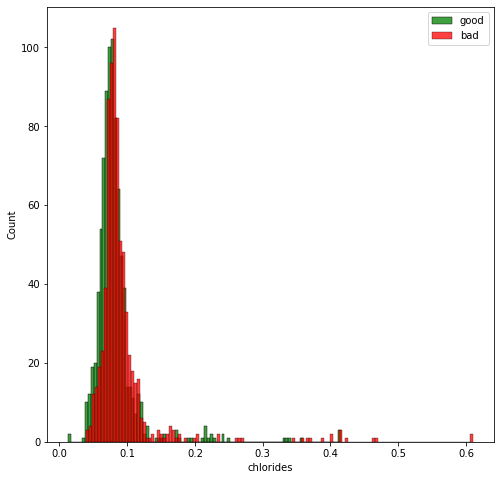

In [13]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.chlorides[df.good == 1], color='green', label='good')
sns.histplot(x=df.chlorides[df.good == 0], color='red', label='bad')
plt.legend()

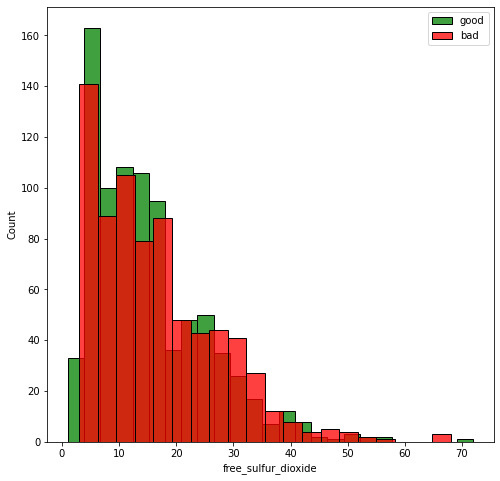

In [14]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.free_sulfur_dioxide[df.good == 1], color='green', label='good')
sns.histplot(x=df.free_sulfur_dioxide[df.good == 0], color='red', label='bad')
plt.legend()

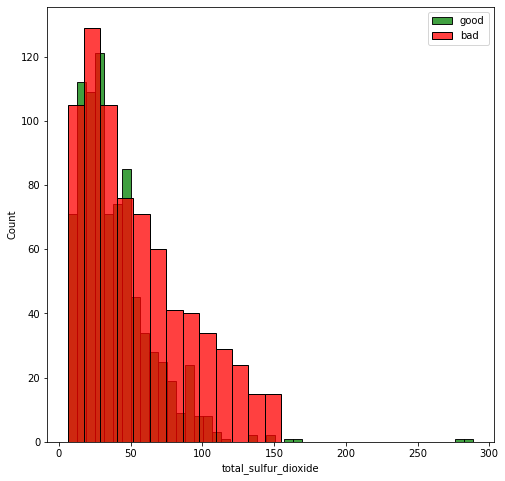

In [15]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.total_sulfur_dioxide[df.good == 1], color='green', label='good')
sns.histplot(x=df.total_sulfur_dioxide[df.good == 0], color='red', label='bad')
plt.legend()

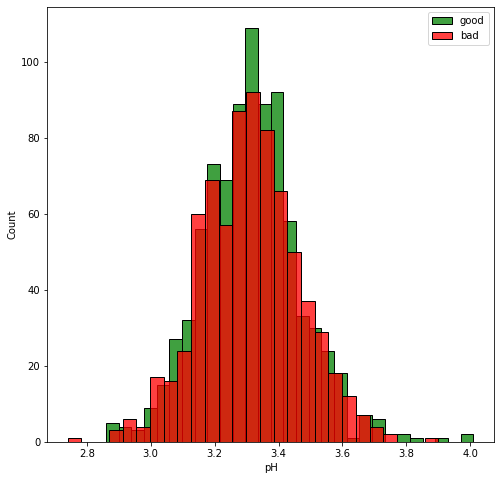

In [16]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.pH[df.good == 1], color='green', label='good')
sns.histplot(x=df.pH[df.good == 0], color='red', label='bad')
plt.legend()

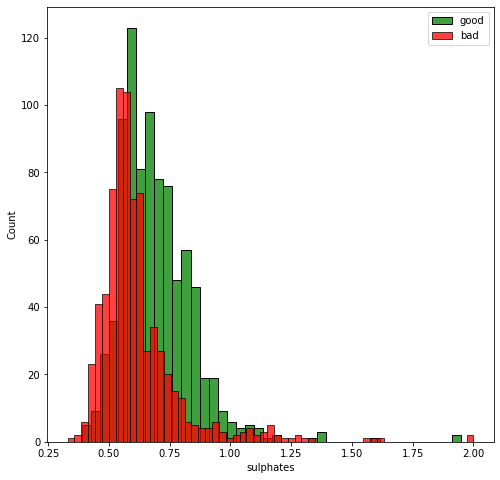

In [17]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.sulphates[df.good == 1], color='green', label='good')
sns.histplot(x=df.sulphates[df.good == 0], color='red', label='bad')
plt.legend()

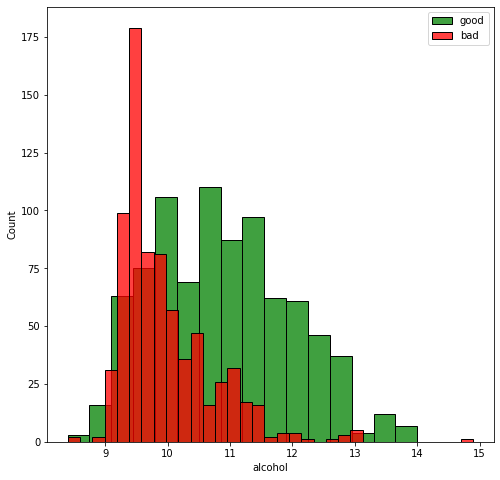

In [18]:
plt.figure(figsize=(8, 8))
sns.histplot(x=df.alcohol[df.good == 1], color='green', label='good')
sns.histplot(x=df.alcohol[df.good == 0], color='red', label='bad')
plt.legend()

### Correlation

<AxesSubplot:>

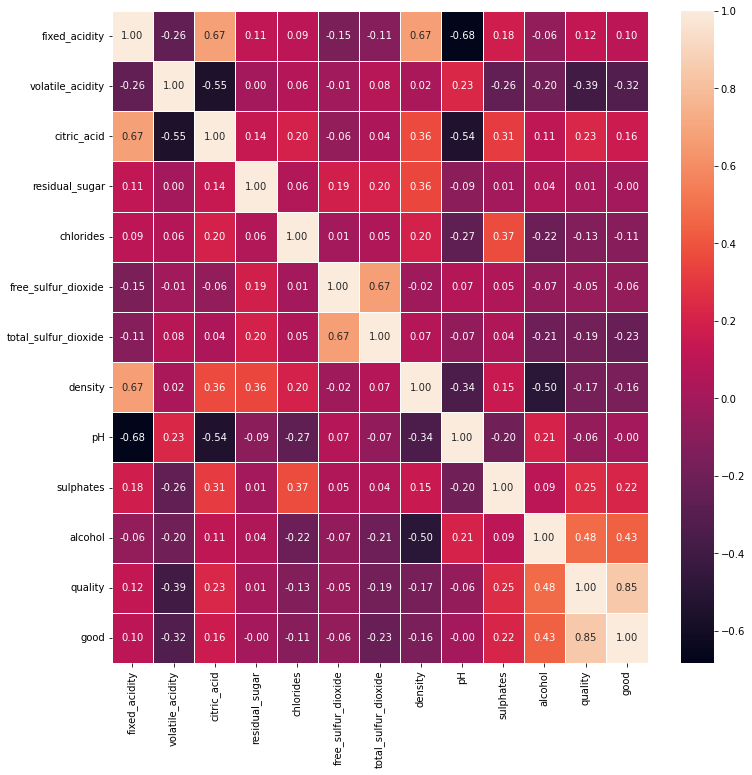

In [19]:
# make correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=.5, fmt='.2f', annot=True)

we can see strong correlations between variables, such as:<br>
- Between "fixed acidity" and "citric acid"<br>
- Between "fixed acidity" and "density"<br>
- Between "fixed acidity" and "pH"<br>
- Between "violatile acidity" and "citric acid"<br>
- Between "volatile acidity" and "pH"<br>
- Between "total sulfur dioxide" and "free sulful dioxide"<br>




# Prediction

### Create train and test data

In [20]:
X = df.drop(['quality', 'good'], axis=1)
y = df.good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train samples: {len(X_train)}, Test samples: {len(X_test)}')

Train samples: 1279, Test samples: 320


### KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()

# scale data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.63      0.65       141
           1       0.72      0.77      0.74       179

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.71      0.70       320



In [22]:
# search best k
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy with k = {k} : {accuracy_score(y_test, y_pred)}')


Accuracy with k = 1 : 0.753125
Accuracy with k = 2 : 0.696875
Accuracy with k = 3 : 0.70625
Accuracy with k = 4 : 0.70625
Accuracy with k = 5 : 0.70625
Accuracy with k = 6 : 0.7
Accuracy with k = 7 : 0.69375
Accuracy with k = 8 : 0.70625
Accuracy with k = 9 : 0.709375
Accuracy with k = 10 : 0.728125
Accuracy with k = 11 : 0.71875
Accuracy with k = 12 : 0.71875
Accuracy with k = 13 : 0.7125
Accuracy with k = 14 : 0.71875
Accuracy with k = 15 : 0.709375
Accuracy with k = 16 : 0.728125
Accuracy with k = 17 : 0.734375
Accuracy with k = 18 : 0.725
Accuracy with k = 19 : 0.7
Accuracy with k = 20 : 0.7125
Accuracy with k = 21 : 0.7125
Accuracy with k = 22 : 0.7125
Accuracy with k = 23 : 0.7125
Accuracy with k = 24 : 0.715625
Accuracy with k = 25 : 0.725
Accuracy with k = 26 : 0.7125
Accuracy with k = 27 : 0.709375
Accuracy with k = 28 : 0.70625
Accuracy with k = 29 : 0.71875
Accuracy with k = 30 : 0.709375


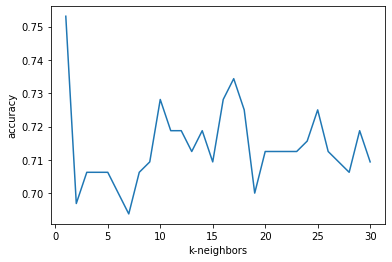

In [23]:
sns.lineplot(x=k_range, y=scores)
plt.xlabel('k-neighbors')
plt.ylabel('accuracy')
plt.show()

Best k-neighbors is 1 because it's the only one that has the best accuracy.<br>
Accuracy: 75.31%

Maybe there are other models that have better accuracy than knn model. I will try them later.